In [43]:
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import pandas as pd
from sklearn.metrics import r2_score
%run -i '../../../../utils.py'

In [75]:
def plot_scfa_microbiome_inference(
    df_elasnet,  # elastic net dataset
    df_rf,       # random forest dataset
    group=None,  # can be 'producer', 'consumer', None
    topN=10, 
    figsize=(10,6), 
    save=False
):
    # reformat elastic net
    df_elasnet = df_elasnet.stack().reset_index()
    df_elasnet = df_elasnet[~df_elasnet.level_1.isin(['BestAlpha','BestL1Ratio','R2'])]
    df_elasnet.columns=['SCFA','Variable','Coefficient']
    df_elasnet = df_elasnet.reset_index(drop=True)

    # reformat random forest
    df_rf = df_rf.stack().reset_index()
    df_rf = df_rf[~df_rf.level_1.isin(['R2'])]
    df_rf.columns=['SCFA','Variable','Gini']
    df_rf = df_rf.reset_index(drop=True)

    # merge two tables
    df_joined = pd.merge(df_rf, df_elasnet, left_on=['SCFA','Variable'], right_on=['SCFA','Variable'], how='inner')
    df_joined.columns = ['SCFA','Taxon','RandomForest','ElasticNet']

    # select positive or negatiev elasticNet results
    if group is not None:
        if group=='producer':
            df_joined = df_joined[df_joined.ElasticNet>0]
        if group=='consumer':
            df_joined = df_joined[df_joined.ElasticNet<0]
    all_scfa = sorted(set(df_joined.SCFA))
    
    fig, ax = plt.subplots(figsize=figsize, nrows=1, ncols=len(all_scfa), constrained_layout=True, sharex=True)
    cbar_ax = fig.add_axes([0.94, .45, .015, .2])
    for k,scfa in enumerate(all_scfa):
        curr_df = df_joined[df_joined.SCFA==scfa]
        curr_df = curr_df.sort_values(by='RandomForest', ascending=False)
        
        # select top Random Forest important scores
        curr_df = curr_df.iloc[0:topN,:] 

        # normalize ElasticNet to -1 and 1
        print(np.abs(curr_df['ElasticNet']).max())
        curr_df['ElasticNet'] = curr_df['ElasticNet']/np.abs(curr_df['ElasticNet'].max())
        
        # plot    
        _ = sns.barplot(y='Taxon', x='RandomForest', orient='h', 
                        palette=matplotlib.cm.ScalarMappable(cmap='RdBu_r').to_rgba(curr_df['ElasticNet']), 
                        data=curr_df, ax=ax[k]) 
            
        #curr_df.values, ax=ax[k], cmap='RdBu_r', vmin=-1, vmax=1, cbar = False if k!=2 else True, cbar_ax = None if k!=2 else cbar_ax, linewidths=0.25, linecolor='black')
        #ax[k].set_xticklabels(['RandomForest','ElasticNet'], rotation=90, fontsize=12)
        ax[k].set_title(scfa, fontsize=15)
        #ax[k].set_yticklabels(curr_df.index, rotation=0, fontsize=12)
        #ax[k].tick_params(axis=u'both', which=u'both',length=0)
        
    # save to figure
    if save:
        plt.rcParams['svg.fonttype'] = 'none'
        if producer:
            fig.savefig("scfa_producer_no_scfa_top%d.svg"%(topN), format="svg")
        else:
            fig.savefig("scfa_consumer_no_scfa_top%d.svg"%(topN), format="svg")
        
    plt.tight_layout()

# SCFA vs microbiome

17    NaN
9     NaN
1     NaN
38    NaN
3     NaN
24    NaN
0     inf
8     NaN
2     NaN
34    NaN
31    NaN
19    NaN
12    NaN
30    NaN
4     NaN
32    NaN
7     NaN
10    NaN
22    NaN
15    NaN
Name: ElasticNet, dtype: float64
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


AssertionError: 

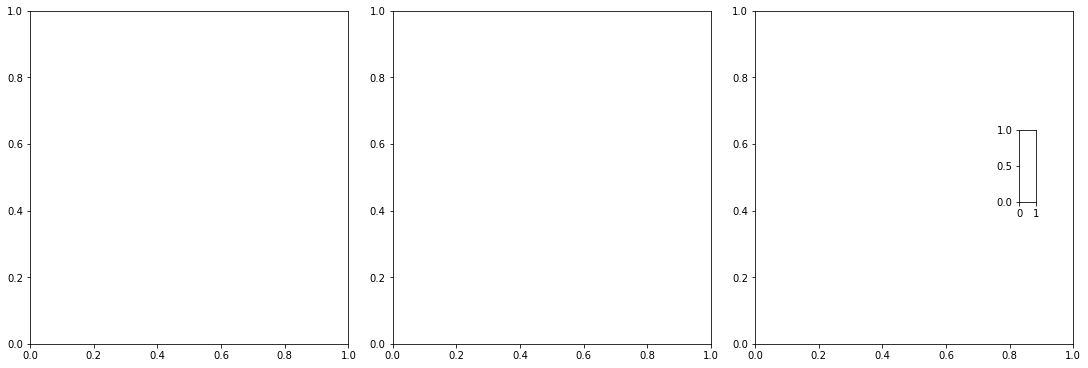

In [67]:
df_elasnet = pd.read_csv('scfa_conc_vs_microbiome/absolute_abundance/elasnet_regression_no_time.csv', index_col=0).set_index('SCFA')
df_rf = pd.read_csv('scfa_conc_vs_microbiome/absolute_abundance/rf_regression_no_time.csv', index_col=0).set_index('SCFA')
plot_scfa_microbiome_inference(df_elasnet, df_rf, topN=20, group=None, figsize=(15,5), save=False)

# dSCFA/dt vs microbiome

0.0
4.7372156026402796e-24
1.4482596968399927e-07


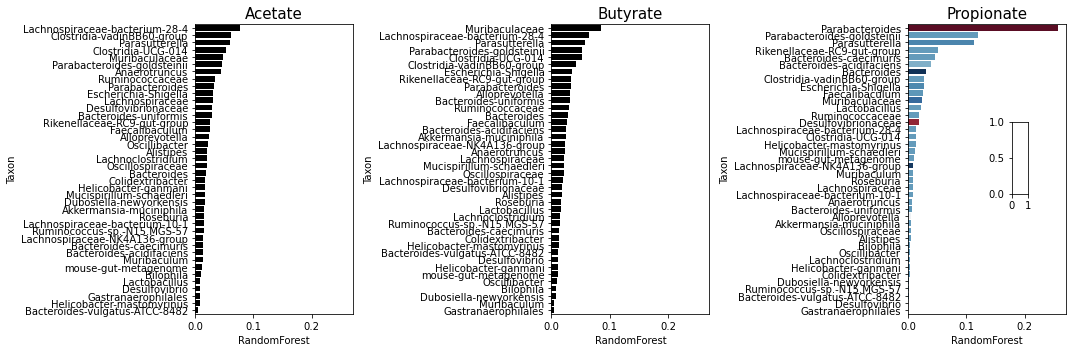

In [76]:
df_elasnet = pd.read_csv('scfa_deriv_vs_microbiome/absolute_abundance/elasnet_regression_no_scfa.csv', index_col=0).set_index('SCFA')
df_rf = pd.read_csv('scfa_deriv_vs_microbiome/absolute_abundance/rf_regression_no_scfa.csv', index_col=0).set_index('SCFA')
plot_scfa_microbiome_inference(df_elasnet, df_rf, topN=40, group=None, figsize=(15,5), save=False)

# dSCFA/dt vs dMicrobiome/dt

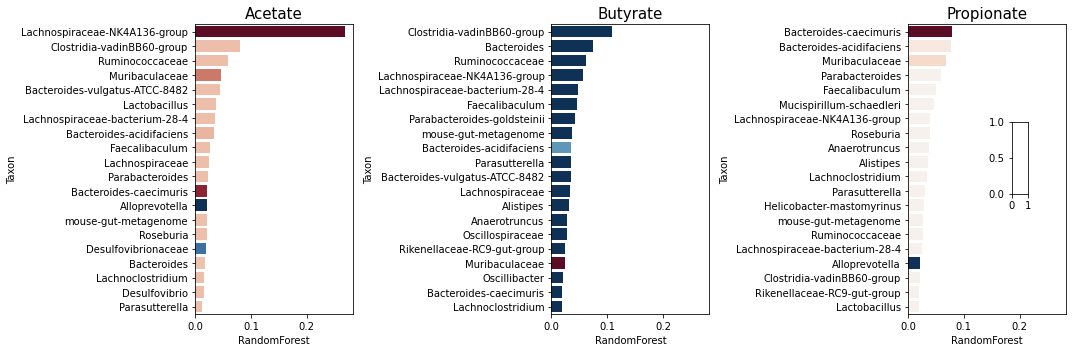

In [60]:
df_elasnet = pd.read_csv('scfa_deriv_vs_microbiome_deriv/absolute_abundance/elasnet_regression_no_scfa.csv', index_col=0).set_index('SCFA')
df_rf = pd.read_csv('scfa_deriv_vs_microbiome_deriv/absolute_abundance/rf_regression_no_scfa.csv', index_col=0).set_index('SCFA')
plot_scfa_microbiome_inference(df_elasnet, df_rf, topN=20, group=None, figsize=(15,5), save=False)

# Compare observed and predicted SCFA derivatives 

In [29]:
def predict_scfa_deriv(scfa=False):
    df_pred = None

    # get raw data
    df_meta = pd.read_excel('../../../../../our_data/meta_data.xlsx', index_col=0)
    df_meta = df_meta[df_meta.Diet=='Inulin']
    df_meta = df_meta.drop('Diet', axis=1)
    df_scfa = pd.read_excel('../../../../../our_data/SCFA.xlsx', index_col=0)
    df_bac = pd.read_excel('../../../../../our_data/16S_absolute_abundance.xlsx', index_col=0)

    # get trained model
    target_scfa=['Acetate','Butyrate','Propionate']
    if scfa:
        df_opt_paras = pd.read_csv('optimal_rf_parameters_w_scfa.csv', index_col=0)
    else:
        df_opt_paras = pd.read_csv('optimal_rf_parameters_no_scfa.csv', index_col=0)

    target_scfa_sliced, df_meta_sliced, df_bac_sliced, df_scfa_sliced, df_scfa_deriv = data_processing_scfa(
        df_meta, df_bac, df_scfa, target_scfa, topN=40, normalize_X=True, exclude_group=None, exclude_vendor=None)

    _,_,reg = train_scfa_dynamics_model(
        df_meta=df_meta, # meta data
        df_bac=df_bac,  # relative abundace or absolute abundance of gut microbiome
        df_scfa=df_scfa, # SCFA measurement
        target_scfa=target_scfa, # dependent variable(s) in the regression
        topN=40, # keep only the most abundance N taxa in the model
        normalize_X=True, # normalize maximum of bacterial abundance to 1
        exclude_group=None, # group of mice excluded from model training
        exclude_vendor=None, # group of mice excluded from model training
        model='RandomForest',# regression model
        opt_params = df_opt_paras, # optimal model parameters
        scfa=scfa # if True, add SCFA scfa, i.e., dSCFA/dt = f(microbiome, SCFA)
    )

    # predict SCFA derivative
    for scfa_ in target_scfa:
        df_pred_tmp = deepcopy(df_scfa_deriv)
        df_pred_tmp = df_pred_tmp[[x for x in df_pred_tmp.columns if x not in list(set(target_scfa)-set([scfa_]))]]
        df_pred_tmp = df_pred_tmp.rename({scfa_:'SCFA_deriv_observed'}, axis=1)
        df_pred_tmp['SCFA_mol'] = scfa_
        df_pred_tmp['SCFA_value_observed'] = df_scfa_sliced[scfa_]

        if scfa:
            X_var = np.concatenate((np.asarray(df_bac_sliced.values), np.asarray(df_scfa_sliced[scfa_]).reshape(-1,1)), 1)
        else:
            X_var = np.asarray(df_bac_sliced.values)
        df_pred_tmp['SCFA_deriv_predicted'] = reg[scfa_].predict(X_var)

        if df_pred is None:
            df_pred = df_pred_tmp
        else:
            df_pred = pd.concat([df_pred, df_pred_tmp], ignore_index=True)

    return df_pred

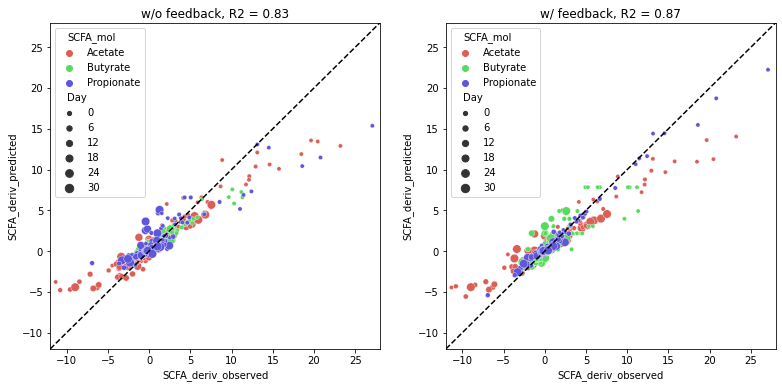

In [30]:
df_pred_no_scfa = predict_scfa_deriv(scfa=False)
df_pred_w_scfa = predict_scfa_deriv(scfa=True)

fig, ax = plt.subplots(figsize=(13,6), nrows=1, ncols=2)

# no scfa
_ = sns.scatterplot(x='SCFA_deriv_observed',y='SCFA_deriv_predicted', hue='SCFA_mol', size='Day', palette=sns.color_palette("hls", 3), data=df_pred_no_scfa, ax=ax[0])
_ = ax[0].plot([-12,28],[-12,28],'k--')
_ = ax[0].set_xlim([-12,28])
_ = ax[0].set_ylim([-12,28])
_ = ax[0].set_title('w/o scfa, R2 = %2.2f'%(r2_score(df_pred_no_scfa.SCFA_deriv_observed, df_pred_no_scfa.SCFA_deriv_predicted)))

# w/ scfa
_ = sns.scatterplot(x='SCFA_deriv_observed',y='SCFA_deriv_predicted', hue='SCFA_mol', size='Day', palette=sns.color_palette("hls", 3), data=df_pred_w_scfa, ax=ax[1])
_ = ax[1].plot([-12,28],[-12,28],'k--')
_ = ax[1].set_xlim([-12,28])
_ = ax[1].set_ylim([-12,28])
_ = ax[1].set_title('w/ scfa, R2 = %2.2f'%(r2_score(df_pred_w_scfa.SCFA_deriv_observed, df_pred_w_scfa.SCFA_deriv_predicted)))

# Plot importance score in hierachical cluster (no scfa)

In [162]:
# read elastic net
df_elasnet = pd.read_csv('elasnet_regression_no_scfa.csv', index_col=0).set_index('SCFA')
df_elasnet = df_elasnet.iloc[:,3:]

# read pearson correlation
df_pearsonr = pd.read_csv('correlation_no_scfa.csv', index_col=0)
df_pearsonr = df_pearsonr[['SCFA','Taxa','PearsonR']]
df_pearsonr = pd.pivot_table(columns='Taxa', values='PearsonR', index='SCFA', data=df_pearsonr)
df_pearsonr = df_pearsonr[df_elasnet.columns]

# random forest
df_rf = pd.read_csv('rf_regression_no_scfa.csv', index_col=0).set_index('SCFA')
df_rf = df_rf.iloc[:,1:]
df_rf = df_rf[df_elasnet.columns]

# signed important score
df_rf = np.sign(df_elasnet)*df_rf 
#df_rf = np.sign(df_pearsonr)*df_rf

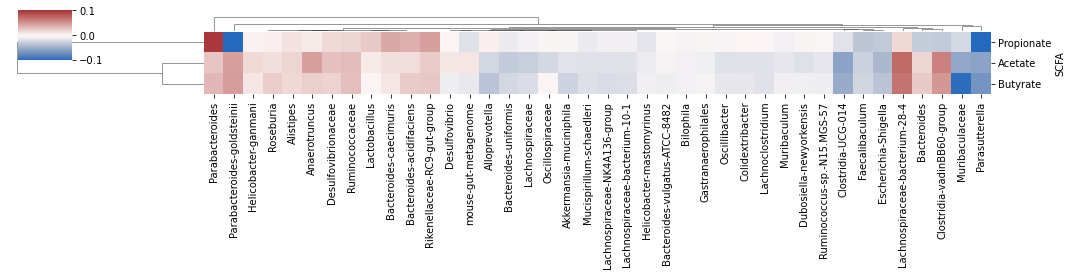

In [178]:
ax = sns.clustermap(df_rf,
                   method='average',
                   cmap="vlag",
                   figsize=(15,3.8),
                   vmin=-0.1,
                   vmax=0.1
                  )
plt.rcParams['svg.fonttype'] = 'none'
ax.savefig("rf_signed_importance_score.svg", format="svg")

In [140]:
# plot the correlation between SCFA production rate vs. relative/abosolute abundance
target_scfa_sliced, df_meta_sliced, df_bac_sliced, df_scfa_sliced, df_scfa_deriv = data_processing_scfa(
    df_meta = df_meta, 
    df_bac = df_bac, 
    df_scfa = df_scfa, 
    target_scfa=['Acetate','Butyrate','Propionate'],
    topN=40,
    normalize_X=False,
    exclude_group=None,
    exclude_vendor=None,
    use_deriv=True)
df_joined = pd.merge(df_meta_sliced, df_scfa_sliced, left_index=True, right_index=True, how='inner')
df_joined = pd.merge(df_joined, df_bac_sliced, left_index=True, right_index=True, how='inner')
df_joined.head()

,MiceID,Vendor,Day,RandomizedGroup,Acetate,Butyrate,Propionate,Muribaculaceae,Akkermansia-muciniphila,Bacteroides-acidifaciens,...,Parabacteroides,Bacteroides-caecimuris,Lactobacillus,Anaerotruncus,Ruminococcaceae,Bilophila,Desulfovibrio,Gastranaerophilales,mouse-gut-metagenome,Helicobacter-mastomyrinus
SampleID,,,,,,,,,,,,,,,,,,,,,
sample141,BI1,Beijing,0,A,5.233899,1.109582,1.930933,2.558057e+07,2.803564e+06,7.311172e+05,...,1.934474e+05,120904.594544,1.069650e+06,3.442225e+05,6.415056e+05,236119.561110,0.000000,2.474988e+05,207671.421217,0.000000e+00
sample142,BI2,Beijing,0,B,13.459823,1.546647,3.621771,1.221770e+07,1.240226e+05,1.518836e+06,...,9.874785e+04,114030.258771,6.060062e+05,1.610530e+05,4.320219e+05,317403.813075,4114.493873,3.996937e+04,108152.410381,0.000000e+00
sample143,BI3,Beijing,0,D,18.075378,1.682656,2.859916,2.765050e+07,3.721486e+05,1.919005e+07,...,7.668770e+06,489229.069651,5.658889e+05,9.700952e+05,6.829694e+05,96173.235914,33451.560318,2.313733e+05,271793.927584,1.063481e+06
sample144,BI4,Beijing,0,E,12.580368,1.477688,3.148773,2.018975e+07,5.967865e+04,5.359602e+06,...,5.738332e+05,172149.962751,5.967865e+04,2.947207e+06,1.223412e+06,218056.619485,135424.637364,4.820199e+04,0.000000,5.187452e+05
sample145,BI5,Beijing,0,C,8.065127,1.835172,3.134209,4.461250e+07,6.279657e+05,3.589337e+06,...,4.865472e+05,127950.117147,3.198753e+04,5.825097e+05,5.909275e+05,114481.683763,43772.408498,1.188589e+06,74076.383611,4.747623e+05


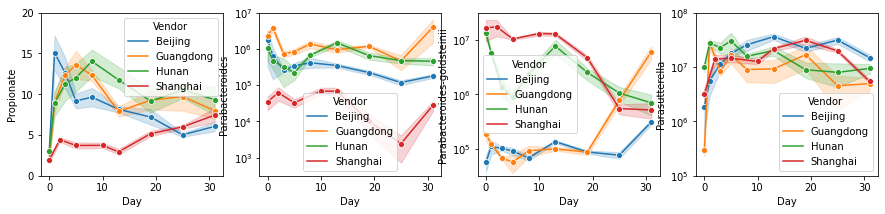

In [180]:
fig, ax = plt.subplots(figsize=(15,3), nrows=1, ncols=4)

# propionate
_ = sns.lineplot(x='Day', y='Propionate', hue='Vendor', marker='o', ci=68, data=df_joined, ax=ax[0])
_ = ax[0].set_ylim([0,20])
_ = ax[0].set_yticks([0,5,10,15,20])
_ = ax[0].minorticks_off()

# parabacteroides
_ = sns.lineplot(x='Day', y='Parabacteroides', hue='Vendor', marker='o', ci=68, data=df_joined, ax=ax[1])
_ = ax[1].set_yscale('log')
_ = ax[1].set_ylim([10**(2.5),10**(7)])
_ = ax[1].minorticks_off()

# parabacteroides
_ = sns.lineplot(x='Day', y='Parabacteroides-goldsteinii', hue='Vendor', marker='o', ci=68, data=df_joined, ax=ax[2])
_ = ax[2].set_yscale('log')
_ = ax[2].set_ylim([10**(4.5),10**(7.5)])
_ = ax[2].minorticks_off()

# parasutterella
_ = sns.lineplot(x='Day', y='Parasutterella', hue='Vendor', marker='o', ci=68, data=df_joined, ax=ax[3])
_ = ax[3].set_yscale('log')
_ = ax[3].set_ylim([10**(5),10**(8)])
_ = ax[3].minorticks_off()

plt.rcParams['svg.fonttype'] = 'none'
fig.savefig("propionate_pos_neg_associations.svg", format="svg")

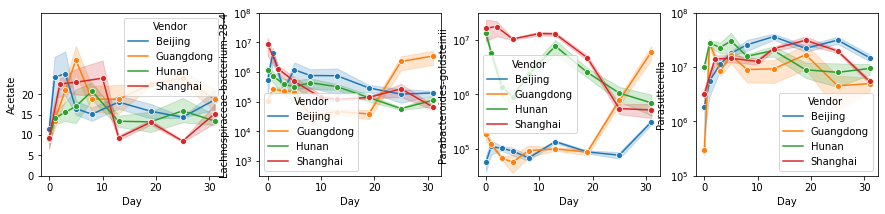

In [184]:
fig, ax = plt.subplots(figsize=(15,3), nrows=1, ncols=4)

# propionate
_ = sns.lineplot(x='Day', y='Acetate', hue='Vendor', marker='o', ci=68, data=df_joined, ax=ax[0])
_ = ax[0].set_ylim([0,40])
_ = ax[0].set_yticks([0,5,10,15,20])
_ = ax[0].minorticks_off()

# parabacteroides
_ = sns.lineplot(x='Day', y='Lachnospiraceae-bacterium-28-4', hue='Vendor', marker='o', ci=68, data=df_joined, ax=ax[1])
_ = ax[1].set_yscale('log')
_ = ax[1].set_ylim([10**(2.5),10**(8)])
_ = ax[1].minorticks_off()

# parabacteroides
_ = sns.lineplot(x='Day', y='Parabacteroides-goldsteinii', hue='Vendor', marker='o', ci=68, data=df_joined, ax=ax[2])
_ = ax[2].set_yscale('log')
_ = ax[2].set_ylim([10**(4.5),10**(7.5)])
_ = ax[2].minorticks_off()

# parasutterella
_ = sns.lineplot(x='Day', y='Parasutterella', hue='Vendor', marker='o', ci=68, data=df_joined, ax=ax[3])
_ = ax[3].set_yscale('log')
_ = ax[3].set_ylim([10**(5),10**(8)])
_ = ax[3].minorticks_off()

plt.rcParams['svg.fonttype'] = 'none'
fig.savefig("butyrate_pos_neg_associations.svg", format="svg")